In [5]:
using CairoMakie
include("../src/parameters.jl")
include("../src/filament_state.jl")

Ri_min (generic function with 1 method)

In [10]:
sp = create_simulation_parameters(; Ri=0.1, Ro=0.8, α=1.5)
(b, v) = get_filament_state(sp)
xs = range(-5, 5, 1024)
zs = range(-1.5sp.H, 0, 256)
@inline ∂x(a) = (x, z) -> (a(x+5e-4, z) - a(x-5e-4, z)) / 1e-3
@inline ∂z(a) = (x, z) -> (a(x, z+5e-4) - a(x, z-5e-4)) / 1e-3
@inline PV(b, v) = (x, z) -> (∂x(v)(x, z) + 1) * ∂z(b)(x, z) - ∂z(v)(x, z) * ∂x(b)(x, z)
@inline invRi(b, v) = (x, z) -> ∂z(v)(x, z) * ∂z(v)(x, z) / ∂z(b)(x, z);

┌ Info: Created simulation parameters
│ Input:
│  Ro=0.8
│  Ri=0.1
│  Ek=0
│  α=1.5
│  λ=0.05
│  δ=-0.25
│  β=0.1
│ Output:
│  L=1
│  f=1
│  H=0.1
│  δH=-0.025
│  N₀=47.799220120223936
│  Nb=3.5913038373553356
│  ℓ=1.5
│  ν=0.0
│  Lz=0.25
│  κ=0.0
└  B₀=0.0
[ Info: Filament state created: Ro=1.8532731708566212, Ro_min=0.7999991463550904, Fr₀=0.038772037832318064, Frb=0.5160446608776456, Ri_min=0.10177366052884107


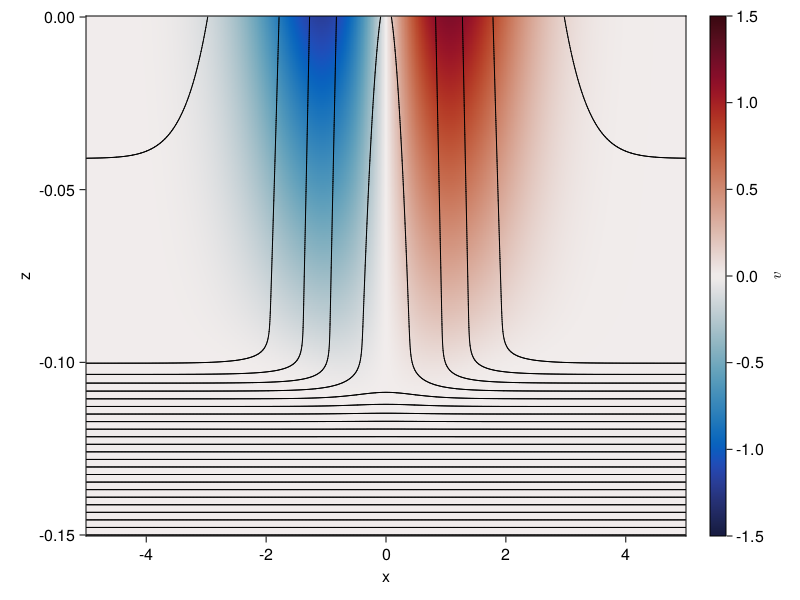

In [11]:
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1]; xlabel="x", ylabel="z")
ht = heatmap!(ax, xs, zs, v; colormap=:balance, colorrange=(-1.5, 1.5))
contour!(ax, xs, zs, b; color=(:black, 1), levels=b(0, -0.15):5:b(100, 0))
#contour!(ax, xs, zs, invRi(b, v); color=:blue, levels=[1/0.95])
#contour!(ax, xs, zs, PV(b, v); color=:red, levels=[0])
Colorbar(fig[1, 2], ht; label=L"v")
fig

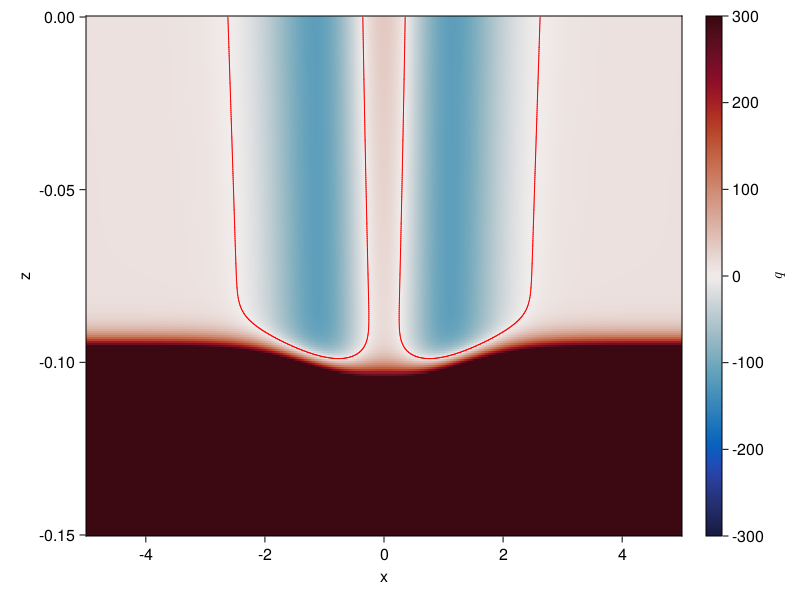

In [12]:
fig = Figure()
ax = Axis(fig[1, 1]; xlabel="x", ylabel="z")
ht = heatmap!(ax, xs, zs, PV(b, v); colormap=:balance, colorrange=(-300, 300))
contour!(ax, xs, zs, b; color=(:black, 1), levels=range(-200, -50, 40))
contour!(ax, xs, zs, PV(b, v); color=(:red, 1), levels=[0])
Colorbar(fig[1, 2], ht; label=L"q")
fig

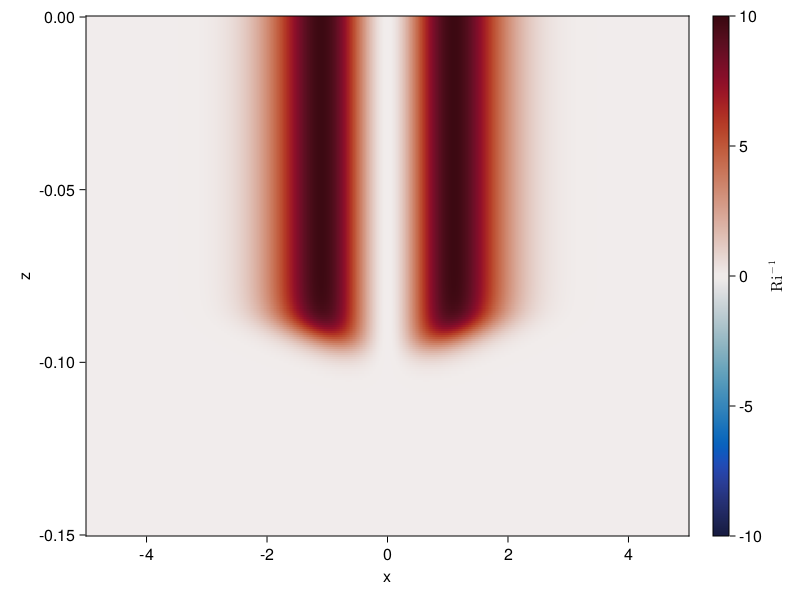

In [13]:
fig = Figure()
ax = Axis(fig[1, 1]; xlabel="x", ylabel="z")
ht = heatmap!(ax, xs, zs, invRi(b, v); colormap=:balance, colorrange=(-10, 10))
contour!(ax, xs, zs, b; color=(:black, 1), levels=range(-200, -50, 40))
Colorbar(fig[1, 2], ht; label=L"\text{Ri}^{-1}")
fig

In [19]:
inv_Ri_top = invRi(b, v).(xs, 0)

1024-element Vector{Float64}:
 5.263178274460389e-7
 5.689623590933063e-7
 6.149565333473798e-7
 6.64554688135285e-7
 7.180297642208953e-7
 7.75674610148189e-7
 8.378033744763141e-7
 9.047529908363688e-7
 9.768847616351796e-7
 1.0545860466888665e-6
 1.1382720632078328e-6
 1.2283878042204738e-6
 1.3254100827013702e-6
 ⋮
 1.2283878042204738e-6
 1.1382720632078328e-6
 1.0545860466888665e-6
 9.768847616351796e-7
 9.047529908363688e-7
 8.378033744763141e-7
 7.75674610148189e-7
 7.180297642208953e-7
 6.64554688135285e-7
 6.149565333473798e-7
 5.689623590933063e-7
 5.263178274460389e-7

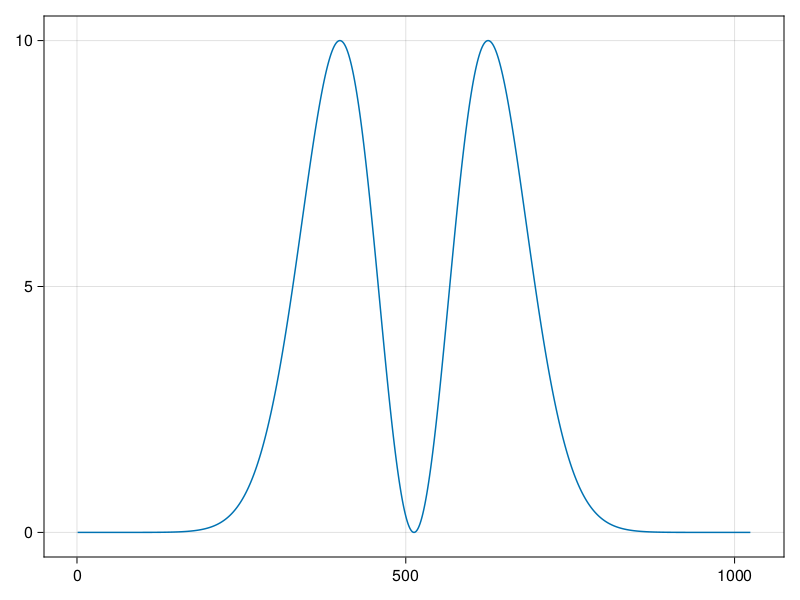

In [20]:
lines(inv_Ri_top)

In [23]:
growth_rate = sqrt.(map(x->x<0 ? 0 : x, inv_Ri_top .- 1))

1024-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

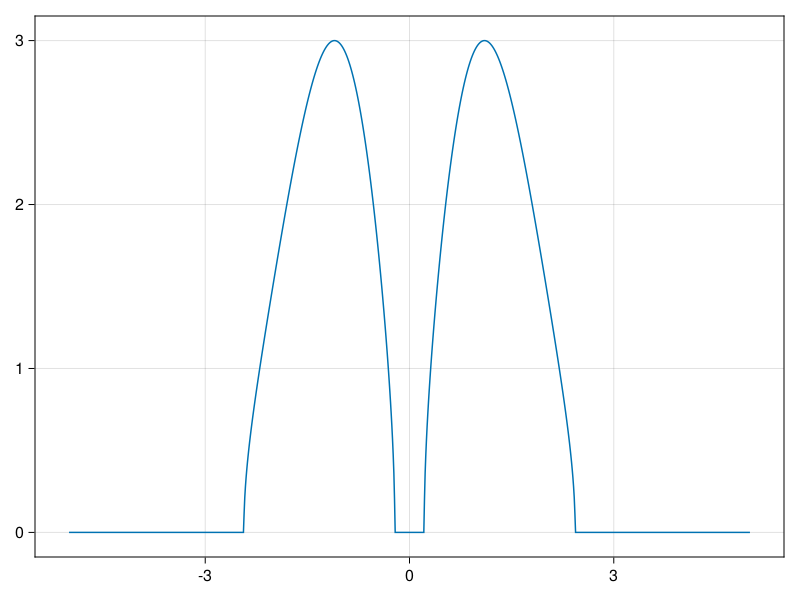

In [25]:
lines(xs, growth_rate)